# 📄 Description
This notebook implements Linear Regression from scratch using PyTorch.

Workflow:
1. Load and preprocess salary data  
2. Visualize training data  
3. Implement linear regression manually  
4. Compute loss and gradients  
5. Train using gradient descent  
6. Test the model and visualize predictions  

Dataset: Salary Data (Years of Experience vs Salary)  
Source: https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv

# 🟥 Data Loading and Initial Exploration

In [4]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
salary.head()


,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


## 🟥 Split Data into Train & Test

In [5]:
x = salary['Experience Years'].values
y = salary['Salary'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## 🟥 Data Scaling

In [6]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_train = x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train)

x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test)

## 🟥 Visualize Training Data

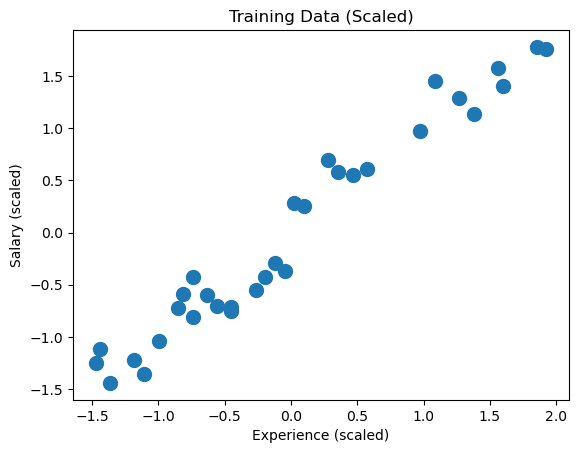

In [7]:
plt.scatter(x_train, y_train, s=100)
plt.title("Training Data (Scaled)")
plt.xlabel("Experience (scaled)")
plt.ylabel("Salary (scaled)")
plt.show()

## 🟥 Convert to Torch Tensors

In [8]:
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

## 🟥 Linear Regression Model

In [9]:
def linear_regression(x, theta0, theta1):
    return theta1 * x + theta0

## 🟥 Mean Squared Error Loss

In [10]:
def mse(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

## 🟥 Gradient Calculation & Update

In [11]:
def calc_gradient(x, y, y_hat):
    error = y_hat - y
    grad_theta0 = 2 * torch.mean(error)
    grad_theta1 = 2 * torch.mean(x * error)
    return grad_theta0, grad_theta1

def update(theta0, theta1, eta, grad_theta0, grad_theta1):
    theta0 -= eta * grad_theta0
    theta1 -= eta * grad_theta1
    return theta0, theta1

## 🟥 Training Loop (Gradient Descent)

In [12]:
theta0 = torch.randn(1)
theta1 = torch.randn(1)

eta = 0.09
n = 100

for iter in range(n):
    y_hat = linear_regression(x_train, theta0, theta1)
    loss = mse(y_hat, y_train)
    grad_theta0, grad_theta1 = calc_gradient(x_train, y_train, y_hat)
    theta0, theta1 = update(theta0, theta1, eta, grad_theta0, grad_theta1)

    if iter % 10 == 0:
        print(f"Iter {iter}/{n} | Loss: {loss.item():.4f} | th0: {theta0.item():.2f} | th1: {theta1.item():.2f}")

Iter 0/100 | Loss: 0.8908 | th0: -0.48 | th1: 0.40
Iter 10/100 | Loss: 0.0601 | th0: -0.07 | th1: 0.90
Iter 20/100 | Loss: 0.0444 | th0: -0.01 | th1: 0.97
Iter 30/100 | Loss: 0.0441 | th0: -0.00 | th1: 0.98
Iter 40/100 | Loss: 0.0441 | th0: -0.00 | th1: 0.98
Iter 50/100 | Loss: 0.0441 | th0: -0.00 | th1: 0.98
Iter 60/100 | Loss: 0.0441 | th0: -0.00 | th1: 0.98
Iter 70/100 | Loss: 0.0441 | th0: -0.00 | th1: 0.98
Iter 80/100 | Loss: 0.0441 | th0: -0.00 | th1: 0.98
Iter 90/100 | Loss: 0.0441 | th0: -0.00 | th1: 0.98


## 🟥 Test the Model

In [20]:
y_hat_test = linear_regression(x_test, theta0, theta1)
test_loss = mse(y_hat_test, y_test)
print(f'Test MSE: {test_loss.item() * 100:.2f}%')

Test MSE: 3.38%


## 🟥 Visualize Predictions on Test Data

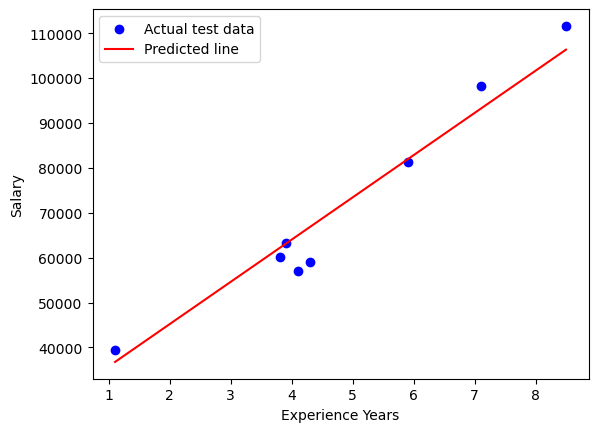

In [14]:
x_test_inv = x_scaler.inverse_transform(x_test.detach().numpy())
y_test_inv = y_scaler.inverse_transform(y_test.detach().numpy())
y_hat_test_inv = y_scaler.inverse_transform(y_hat_test.detach().numpy())

plt.scatter(x_test_inv, y_test_inv, color="blue", label="Actual test data")
sorted_idx = np.argsort(x_test_inv[:, 0])
plt.plot(x_test_inv[sorted_idx], y_hat_test_inv[sorted_idx], color="red", label="Predicted line")
plt.xlabel("Experience Years")
plt.ylabel("Salary")
plt.legend()
plt.show()